# Collate Results

In [2]:
import os
import re

# Directory containing the simulation output files
directory = '/Users/rahulvigneswaran/Documents/Assignment 1/Task_3/results_200M'  # Replace with the actual path to your files

# Ordered list of traces (as per your bash script)
traces = [
    "603.bwaves_s-3699B.champsimtrace.xz",
    "648.exchange2_s-1699B.champsimtrace.xz",
    "638.imagick_s-10316B.champsimtrace.xz",
    "644.nab_s-5853B.champsimtrace.xz",
    "627.cam4_s-573B.champsimtrace.xz",
    "600.perlbench_s-210B.champsimtrace.xz",
    "623.xalancbmk_s-700B.champsimtrace.xz",
    "654.roms_s-842B.champsimtrace.xz",
    "625.x264_s-18B.champsimtrace.xz",
    "607.cactuBSSN_s-2421B.champsimtrace.xz",
    "631.deepsjeng_s-928B.champsimtrace.xz",
    "628.pop2_s-17B.champsimtrace.xz",
    "649.fotonik3d_s-1176B.champsimtrace.xz",
]

# "prob" values used in your simulations
probs = ['-1', '10', '20', '30']

# Data structure to hold extracted data grouped by "prob" value
data = {prob: [] for prob in probs}

# Iterate over "prob" values
for prob in probs:
    # For each "prob" value, process traces in order
    for trace in traces:
        # Construct the expected filename
        # Assuming the filename pattern is:
        # "{trace}-bimodal-no-no-no-no-srrip-1core-4MB-{prob}-0.txt"
        trace_basename = os.path.basename(trace)
        filename = f"{trace_basename}-bimodal-no-no-no-no-srrip-1core-4MB-{prob}-0.txt"
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            with open(filepath, 'r') as file:
                lines = file.readlines()
                # Find the last line containing performance metrics
                metrics_line = None
                for i in range(len(lines)-1, -1, -1):
                    line = lines[i].strip()
                    # Skip empty lines
                    if not line:
                        continue
                    # Match the line with performance metrics
                    if re.match(r'^\d+\.\d+,', line):
                        metrics_line = line
                        break
                if not metrics_line:
                    print(f'Metrics line not found in file: {filename}')
                    data[prob].append('')  # Append an empty string or placeholder
                else:
                    data[prob].append(metrics_line)
        else:
            print(f'File not found: {filename}')
            data[prob].append('')  # Append an empty string or placeholder

# Write the data to a CSV file
output_file = 'task3.csv'
with open(output_file, 'w') as f:
    for prob in probs:
        # Write the "prob" value line
        f.write(f'{prob},\n')
        # Write the data lines for this "prob" value
        for metrics_line in data[prob]:
            f.write(f'{metrics_line}\n')
        # Optionally, add an empty line between "prob" values
        # f.write('\n')

print(f'Data has been written to {output_file}')


Data has been written to task3.csv


# Plots

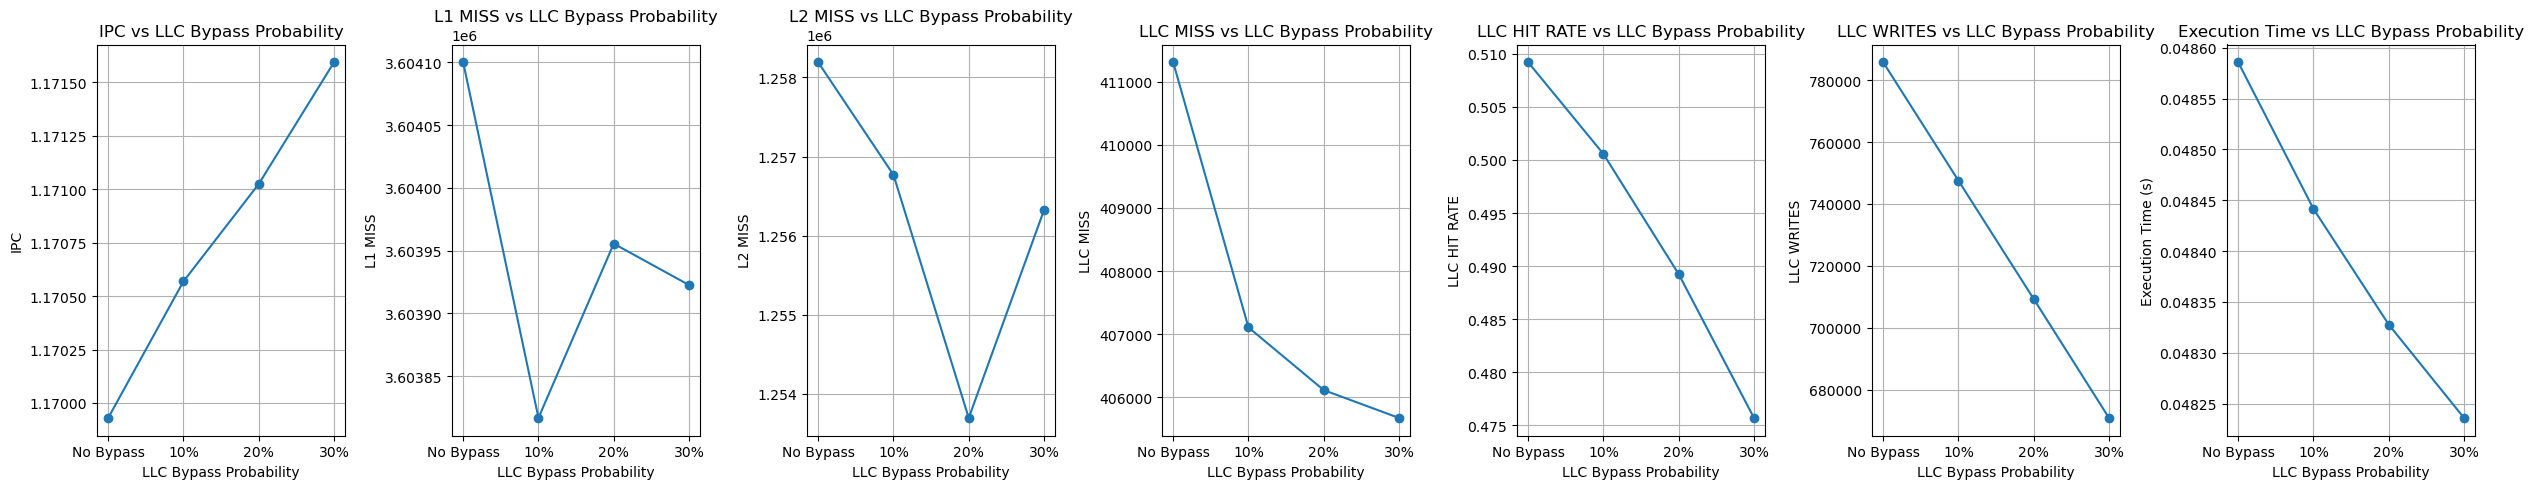

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
llc_bypass_prob = ['No Bypass', '10%', '20%', '30%']
ipc = [1.169930154,1.170568308,1.171023385,1.171592308]
l1_miss = [3604100,3603816.615,3603955.462,3603922.538]
l2_miss = [1258191.846,1256768.077,1253693.077,1256322.308]
llc_miss = [411305.5385,407108.2308,406115.6923,405675.2308]
llc_hit_rate = [0.5092017692,0.5005581538,0.4892378462,0.4756953077]
llc_writes = [785765.6923,747523.1538,709295.7692,670869]
execution_time = [0.04858570769,0.04844156923,0.0483278,0.04823595385]

# Prepare subplots - 1 row, 7 columns
fig, axs = plt.subplots(1, 7, figsize=(25, 5))

# List of data and labels to plot
data = [
    (ipc, 'IPC', 'IPC vs LLC Bypass Probability'),
    (l1_miss, 'L1 MISS', 'L1 MISS vs LLC Bypass Probability'),
    (l2_miss, 'L2 MISS', 'L2 MISS vs LLC Bypass Probability'),
    (llc_miss, 'LLC MISS', 'LLC MISS vs LLC Bypass Probability'),
    (llc_hit_rate, 'LLC HIT RATE', 'LLC HIT RATE vs LLC Bypass Probability'),
    (llc_writes, 'LLC WRITES', 'LLC WRITES vs LLC Bypass Probability'),
    (execution_time, 'Execution Time (s)', 'Execution Time vs LLC Bypass Probability')
]

# Plot each variable in the respective subplot
for i, (y, ylabel, title) in enumerate(data):
    axs[i].plot(llc_bypass_prob, y, marker='o')
    axs[i].set_xlabel('LLC Bypass Probability')
    axs[i].set_ylabel(ylabel)
    axs[i].set_title(title)
    axs[i].grid(True)

# Adjust layout to fit all plots
plt.tight_layout()
plt.show()